## Toy Model 2: traveling wave

### Created by Yuying Liu, 09/23/2019

$$\Phi(x, t) = u(x)cos(\omega_0 t) + v(x, t)cos(\omega_1 t + \frac{\pi}{4})$$

In [1]:
# imports
import os
import sys
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import torch_cae_multilevel_V4 as net

## simulation

In [2]:
# params
w0 = 0.5
w1 = 4.0
sigma0 = 10.0
sigma1 = 0.25
v = 0.5

In [3]:
# define two modes
def phi1(x, y, t):
    return 1./np.cosh((x+1)/sigma0)/np.cosh((y-1)/sigma0)*np.cos(w0*t)

def phi2(x, y, t):
    return 1./(sigma1*np.sqrt(2*np.pi))*np.exp(-((x-3+v*t)**2+(y+3-v*t)**2)/(2*sigma1**2))*np.cos(w1*t)
def phi1_n(x, y, t):
    return np.cosh((x+1)/sigma0)*np.cosh((y-1)/sigma0)*np.cos(w0*t)

def phi2_n(x, y, t):
    return (sigma1*np.sqrt(2*np.pi))*np.exp(-((x-3+v*t)**2+(y+3-v*t)**2)/(2*sigma1**2))*np.cos(w1*t)

In [4]:
# mesh grids
x = np.linspace(-5, 5, 127)
y = np.linspace(-5, 5, 127)
t = np.linspace(0, 4*np.pi, 500)
xgrid, ygrid, tgrid = np.meshgrid(x, y, t)

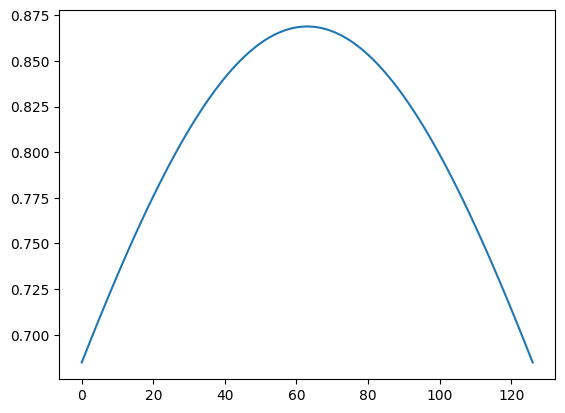

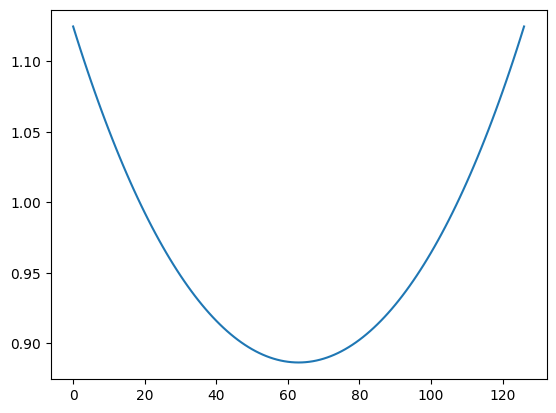

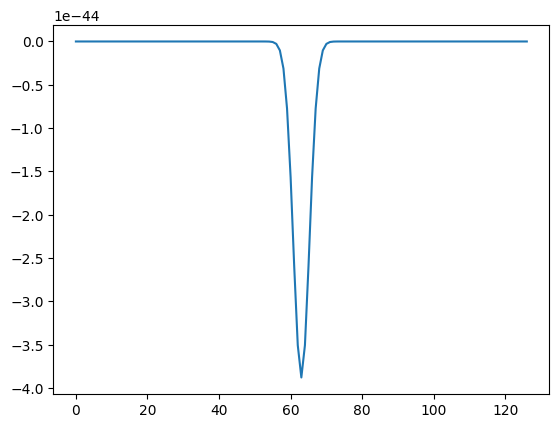

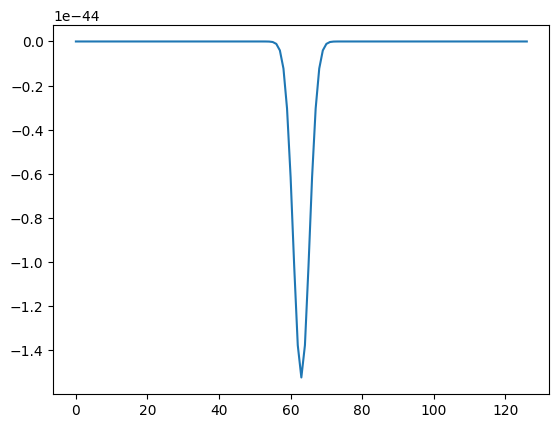

In [5]:
plt.figure()
plt.plot(phi1(x,y,1))
plt.figure()
plt.plot(phi1_n(x,y,1))
plt.figure()
plt.plot(phi2(x,y,1))
plt.figure()
plt.plot(phi2_n(x,y,1))

In [5]:
# data
Phi = phi1(xgrid, ygrid, tgrid) + phi2(xgrid, ygrid, tgrid)
scaled_Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min())
print(Phi.shape)

(127, 127, 500)


## MrCAE

In [9]:
# init model & load data
data_path = '../data/npy/toy2.npy'
model_path = '../model/toy2/'
result_path = '../result/toy2/'

dataset = net.MultiScaleDynamicsDataSet(data_path, n_levels=3)

In [10]:
# training
archs =[[1,3,5,7]]
tols = [0.001, 0.0005, 0.0001]
net.train_net(archs=archs, dataset=dataset, max_epoch=5000, batch_size=350, 
              tols=tols, activation=torch.nn.Sequential(), w=0.5, model_path=model_path, 
              result_path=result_path, std=0.01, verbose=2)

# of filters in each group:  [1, 1, 1]
*************************************************
Model @Level 0:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0026/0.0051/0.0039, global: 0.0026/0.0054/0.0040
[validation set] local: 0.0030/0.0077/0.0053, global: 0.0030/0.0077/0.0053
epoch [500/5000]:
[training set] local: 0.0001/0.0019/0.0010, global: 0.0001/0.0019/0.0010
[validation set] local: 0.0001/0.0033/0.0017, global: 0.0001/0.0033/0.0017
epoch [1000/5000]:
[training set] local: 0.0001/0.0019/0.0010, global: 0.0001/0.0019/0.0010
[validation set] local: 0.0001/0.0034/0.0018, global: 0.0001/0.0034/0.0018
epoch [1500/5000]:
[training set] local: 0.0001/0.0019/0.0010, global: 0.0001/0.0019/0.0010
[validation set] local: 0.0001/0.0035/0.0018, global: 0.0001/0.0035/0.0018
epoch [2000/5000]:
[training set] local: 0.0001/0.0019/0.0010, global: 0.0001/0.0019/0.0010
[validati

/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CAE. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2dBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: U

epoch [500/5000]:
[training set] local: 0.0001/0.0018/0.0009, global: 0.0001/0.0019/0.0010
[validation set] local: 0.0001/0.0033/0.0017, global: 0.0001/0.0033/0.0017
epoch [1000/5000]:
[training set] local: 0.0001/0.0018/0.0009, global: 0.0001/0.0019/0.0010
[validation set] local: 0.0001/0.0032/0.0016, global: 0.0001/0.0032/0.0016
epoch [1500/5000]:
[training set] local: 0.0000/0.0017/0.0009, global: 0.0000/0.0018/0.0009
[validation set] local: 0.0000/0.0031/0.0016, global: 0.0000/0.0031/0.0016
epoch [2000/5000]:
[training set] local: 0.0000/0.0016/0.0008, global: 0.0000/0.0017/0.0009
[validation set] local: 0.0000/0.0028/0.0014, global: 0.0000/0.0028/0.0014
epoch [2500/5000]:
[training set] local: 0.0000/0.0013/0.0006, global: 0.0000/0.0015/0.0008
[validation set] local: 0.0000/0.0022/0.0011, global: 0.0000/0.0022/0.0011
epoch [3000/5000]:
[training set] local: 0.0000/0.0006/0.0003, global: 0.0000/0.0012/0.0006
[validation set] local: 0.0000/0.0010/0.0005, global: 0.0000/0.0016/0.0008

epoch [1000/5000]:
[training set] local: 0.0000/0.0003/0.0002, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0005/0.0003, global: 0.0000/0.0005/0.0003
epoch [1500/5000]:
[training set] local: 0.0000/0.0003/0.0002, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [2000/5000]:
[training set] local: 0.0000/0.0003/0.0002, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0005/0.0002, global: 0.0000/0.0005/0.0002
epoch [2500/5000]:
[training set] local: 0.0000/0.0003/0.0001, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [3000/5000]:
[training set] local: 0.0000/0.0003/0.0001, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.0002
epoch [3500/5000]:
[training set] local: 0.0000/0.0003/0.0001, global: 0.0000/0.0003/0.0002
[validation set] local: 0.0000/0.0004/0.0002, global: 0.0000/0.0004/0.000

epoch [3000/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [3500/5000]:
[training set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [4000/5000]:
[training set] local: 0.0000/0.0001/0.0000, global: 0.0000/0.0001/0.0000
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [4500/5000]:
[training set] local: 0.0000/0.0001/0.0000, global: 0.0000/0.0001/0.0000
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001
epoch [5000/5000]:
[training set] local: 0.0000/0.0001/0.0000, global: 0.0000/0.0001/0.0000
[validation set] local: 0.0000/0.0001/0.0001, global: 0.0000/0.0001/0.0001

-------------------------------------------------
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.000

## Results

### l2 loss + linf loss

In [11]:
# trained models at different levels
models = {}
print('model names: model_L{level}_{index}')
for file_name in sorted(os.listdir(model_path)):
    model_name, _ = file_name.split('.')
    print(model_name)
    models[model_name] = torch.load(os.path.join(model_path, file_name))

model names: model_L{level}_{index}
model_L0_0
model_L0_1
model_L0_2
model_L0_3
model_L1_0
model_L1_1
model_L1_2
model_L1_3
model_L2_0
model_L2_1
model_L2_2
model_L2_3


dict_keys(['0', '1', '2', '3'])
dict_keys(['0', '1', '2', '3'])
dict_keys(['0', '1', '2', '3'])


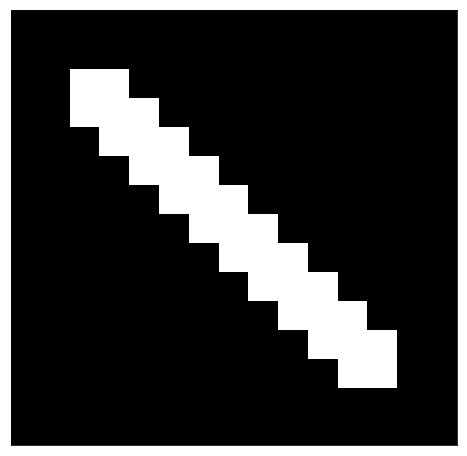

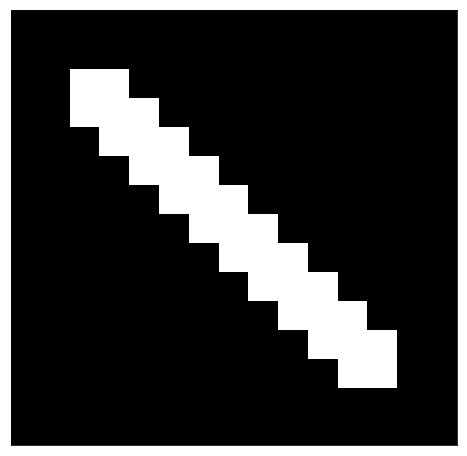

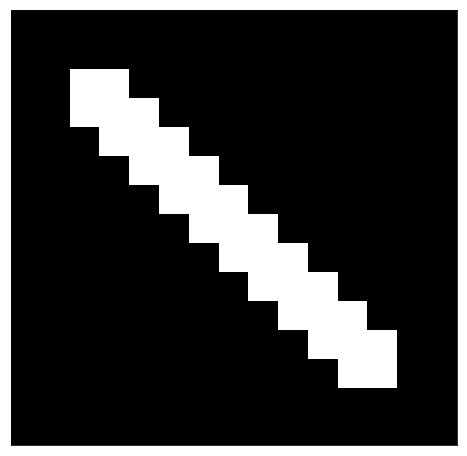

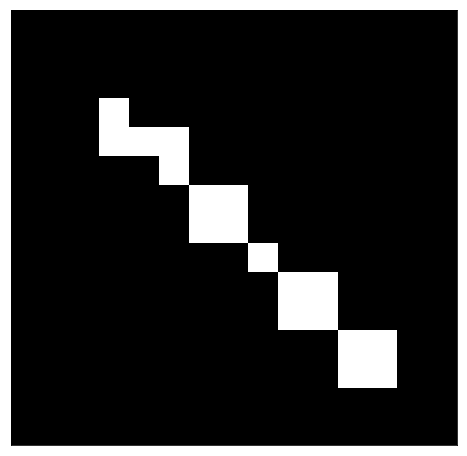

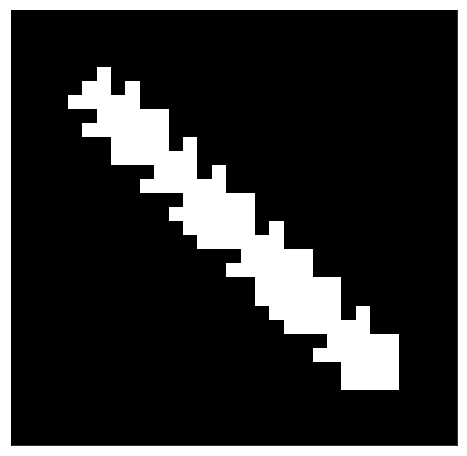

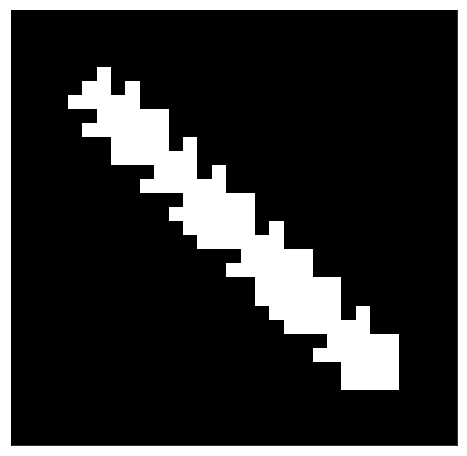

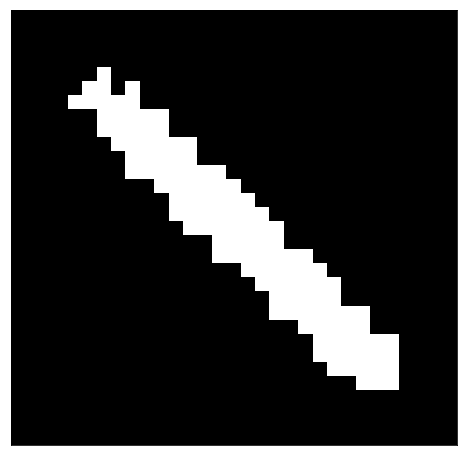

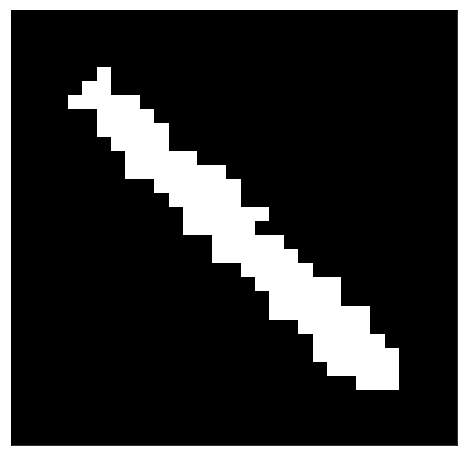

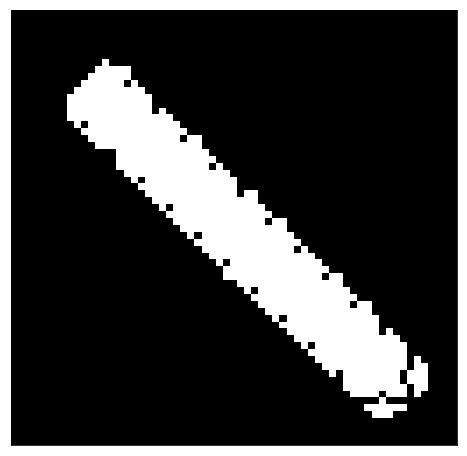

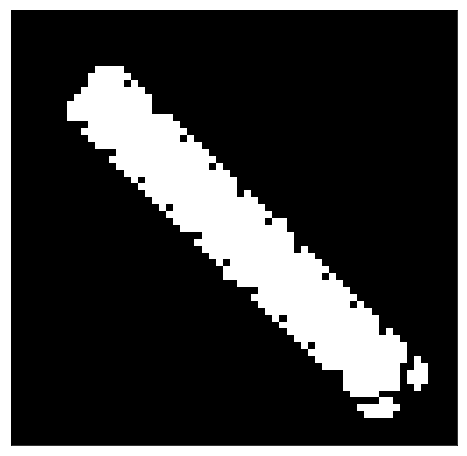

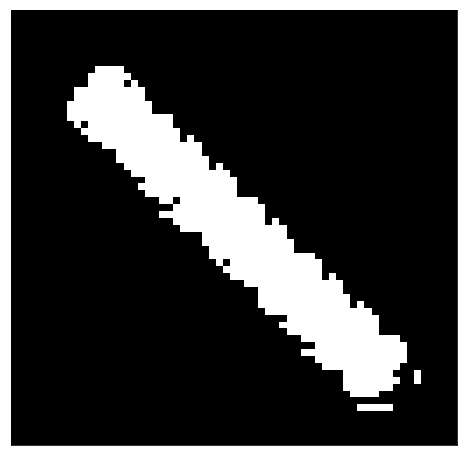

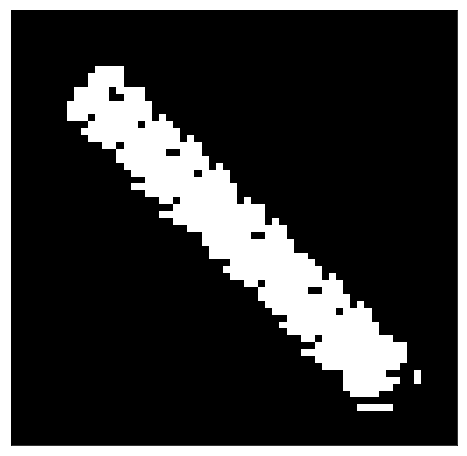

In [20]:
# choose the finest model
model = models['model_L2_3']

# resolved maps at different levels (that suggest poorly reconstructed regions)
for i in range(3):
    print(model.resolved_maps[str(i)].keys())

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['0']['0'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L0_I0.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['0']['1'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L0_I1.png'))

            
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['0']['2'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L0_I2.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['0']['3'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L0_I3.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['1']['0'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L1_I0.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['1']['1'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L1_I1.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['1']['2'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L1_I2.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['1']['3'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L1_I3.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['2']['0'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L2_I0.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['2']['1'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L2_I1.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['2']['2'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L2_I2.png'))


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.pcolor(model.resolved_maps['2']['3'].cpu().detach().numpy(), cmap='binary', vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(result_path, 'L2_I3.png'))

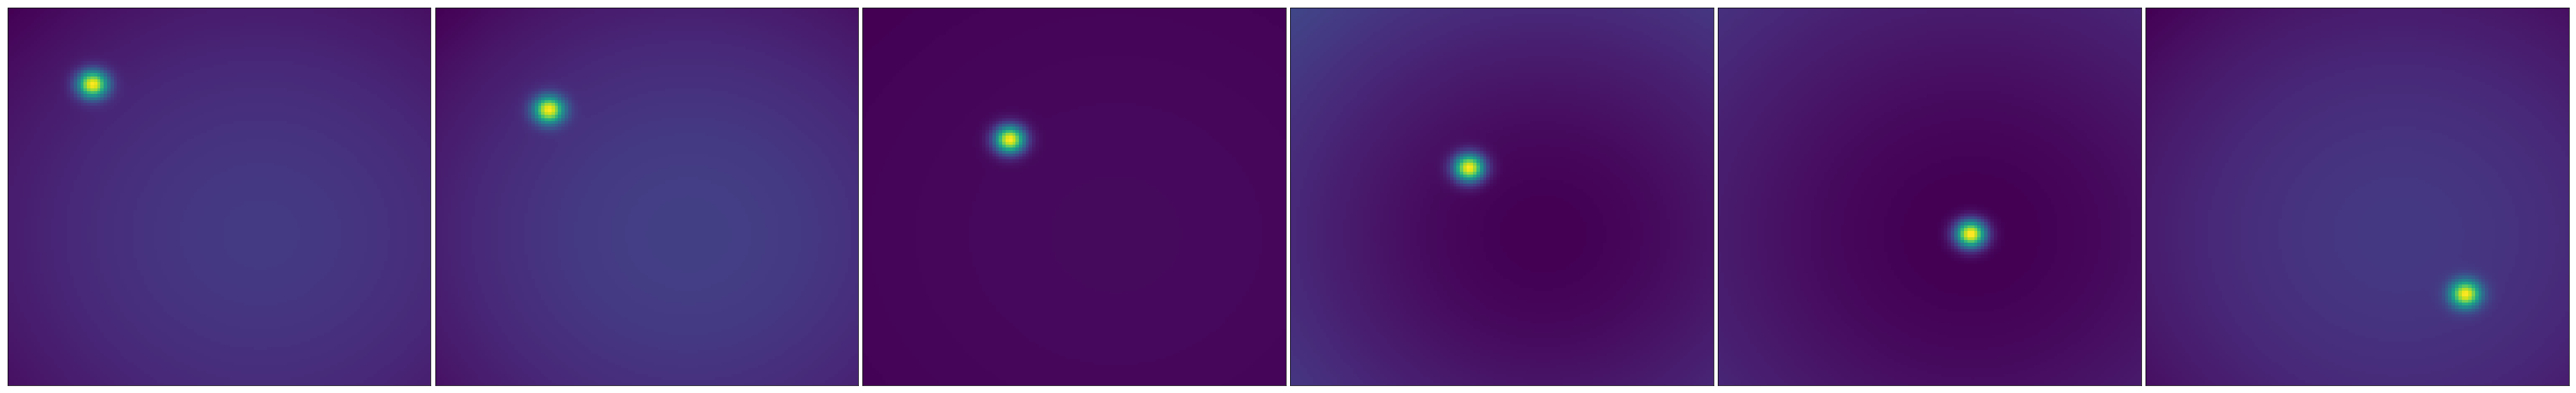

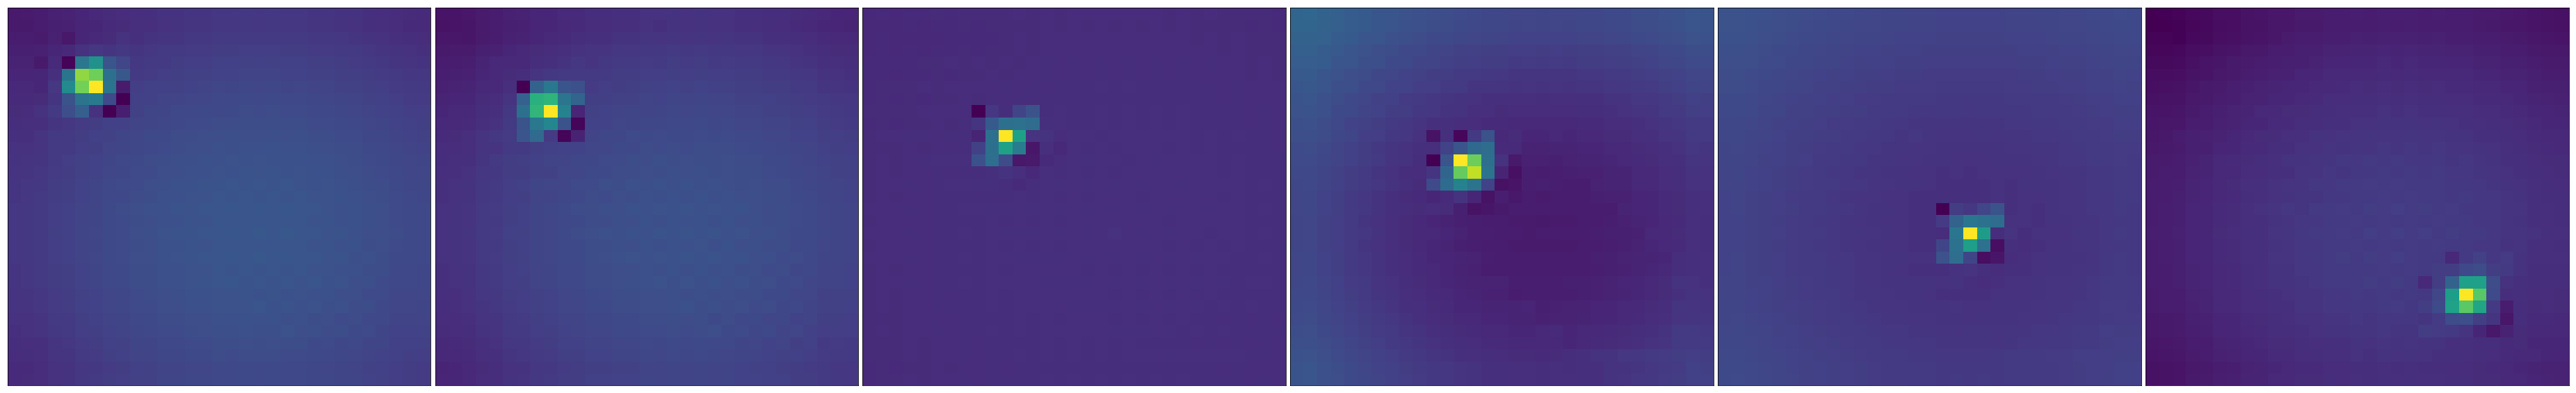

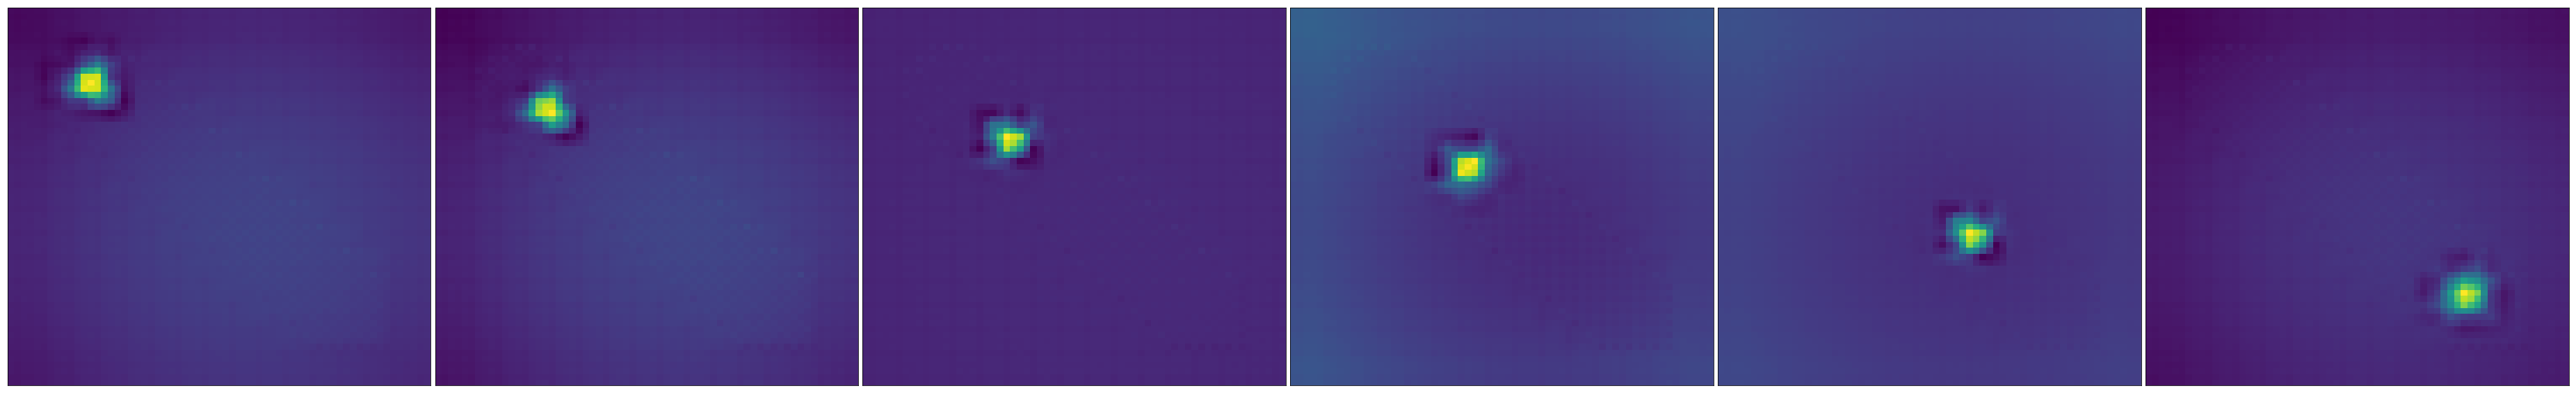

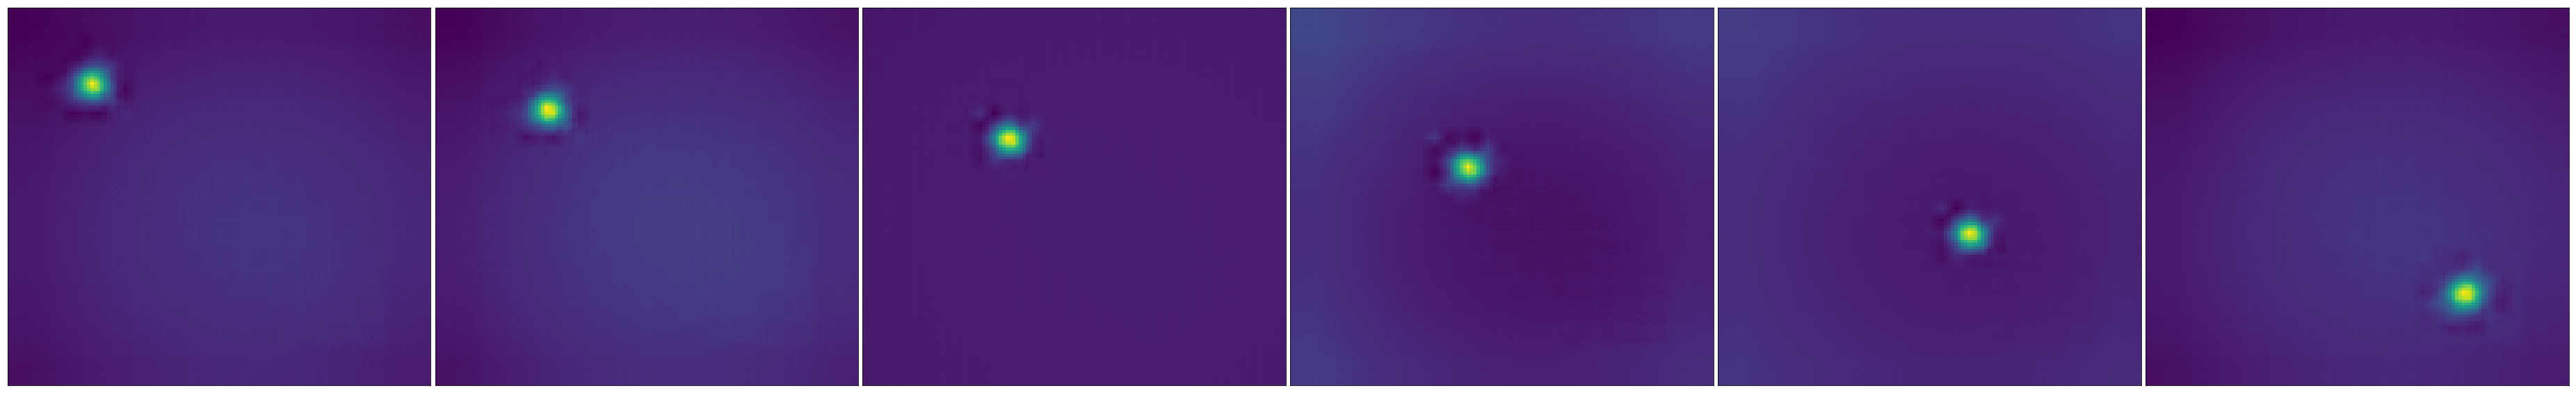

In [21]:
inds = np.array(sorted(dataset.test_inds))
dataset.test_inds = inds
n_snapshots = len(inds)
n_samples = 6
n_step = n_snapshots // 6

fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    axes[i].pcolor(dataset.data[inds[i*n_step], :, :, :].squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_samples.png'), bbox_inches='tight')


model = models['model_L0_3']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=0)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].pcolor(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.savefig(os.path.join(result_path, 'test_L0_reconstructions.png'), bbox_inches='tight')


model = models['model_L1_3']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=1)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].pcolor(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_L1_reconstructions.png'), bbox_inches='tight')


model = models['model_L2_3']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=2)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].pcolor(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_L2_reconstructions.png'), bbox_inches='tight')

[]

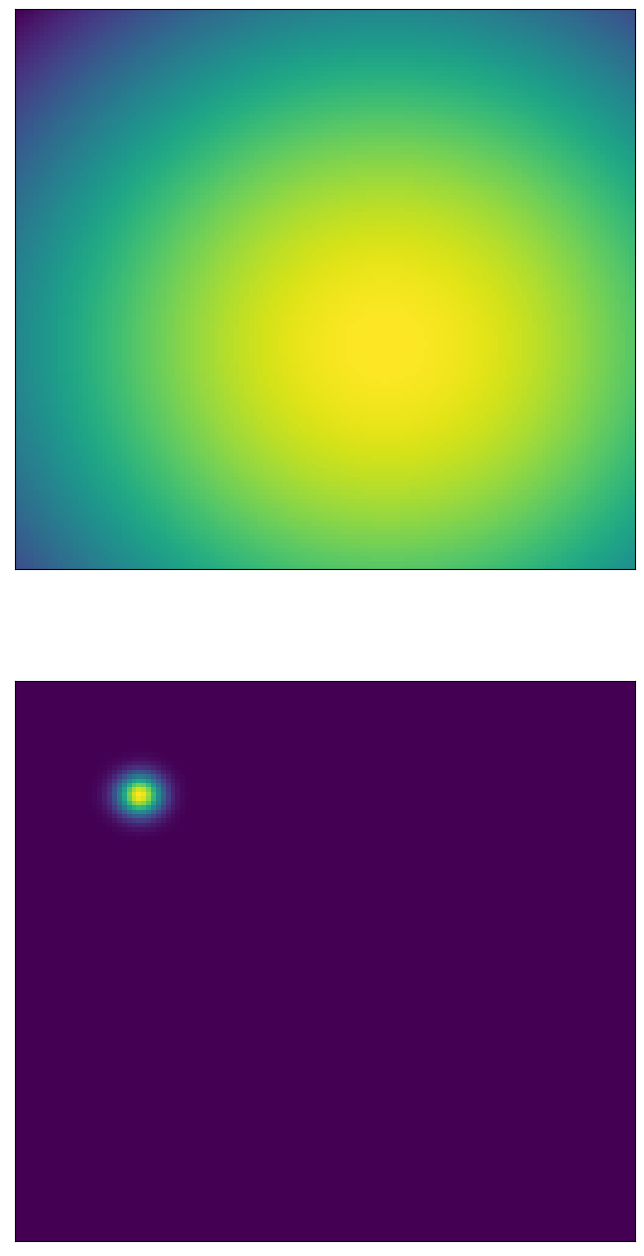

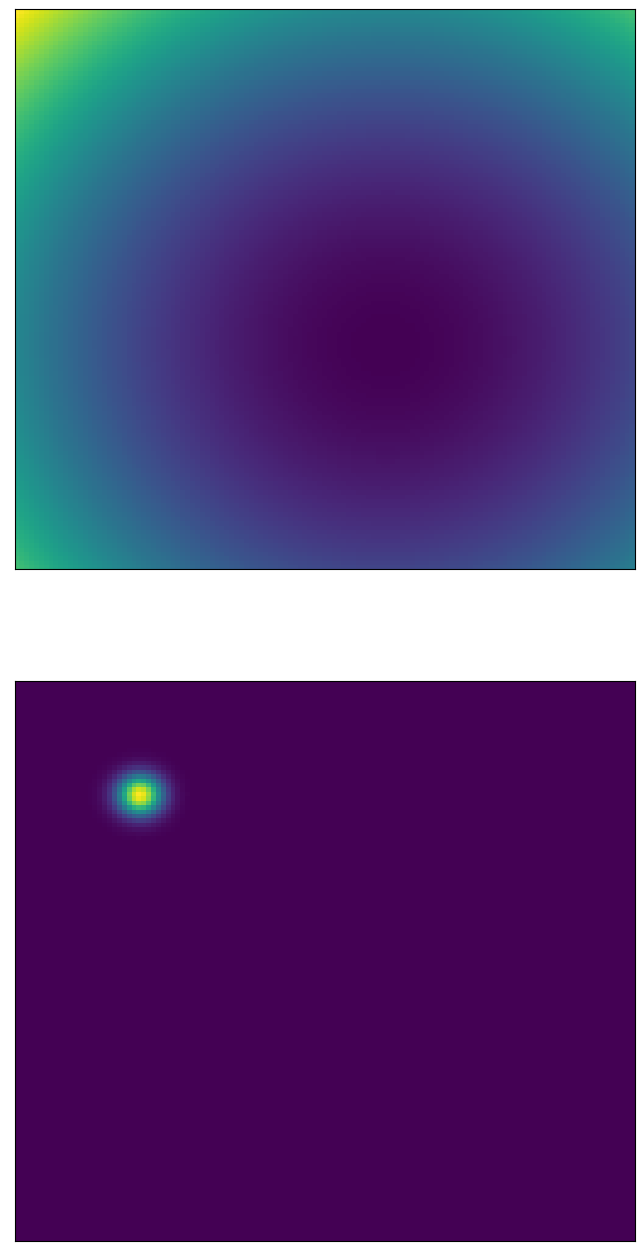

In [7]:
fig1, axes = plt.subplots(2, 1, figsize=(8, 16))
axes[0].pcolor(xgrid[:,:,0], ygrid[:,:,0], phi1(xgrid, ygrid, tgrid)[:, :, 0].T, cmap='viridis')
axes[1].pcolor(xgrid[:,:,0], ygrid[:,:,0], phi2(xgrid, ygrid, tgrid)[:, :, 0].T, cmap='viridis')

axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].set_yticks([])
axes[1].set_yticks([])
#fig1.savefig(os.path.join(result_path, 'spatial_dynamics.png'))
fig1, axes = plt.subplots(2, 1, figsize=(8, 16))
axes[0].pcolor(xgrid[:,:,0], ygrid[:,:,0], phi1_n(xgrid, ygrid, tgrid)[:, :, 0].T, cmap='viridis')
axes[1].pcolor(xgrid[:,:,0], ygrid[:,:,0], phi2_n(xgrid, ygrid, tgrid)[:, :, 0].T, cmap='viridis')

axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].set_yticks([])
axes[1].set_yticks([])

#fig1.savefig(os.path.join(result_path, 'spatial_dynamics.png'))

# fig2, axes = plt.subplots(2, 1, figsize=(14*7, 24))
# axes[0].plot(t, np.cos(w0*t), t[inds[::n_step]], np.cos(w0*t[inds[::n_step]]), 'r.', linewidth=20, markersize=80)
# axes[1].plot(t, np.cos(w1*t + np.pi/4), t[inds[::n_step]], np.cos(w1*t[inds[::n_step]] + np.pi/4), 'r.', linewidth=20, markersize=80)
# #
# axes[0].set_xticks([])
# axes[1].set_xticks([])
# axes[0].set_yticks([])
# axes[1].set_yticks([])
#fig2.savefig(os.path.join(result_path, 'temporal_dynamics.png'))

In [27]:
records = {}
for file_name in sorted(os.listdir(result_path)):
    if file_name.endswith('.dat'):
        key, _ = file_name.split('.')
        with open(os.path.join(result_path, file_name), 'rb') as f: 
            records[key]= pickle.load(f)

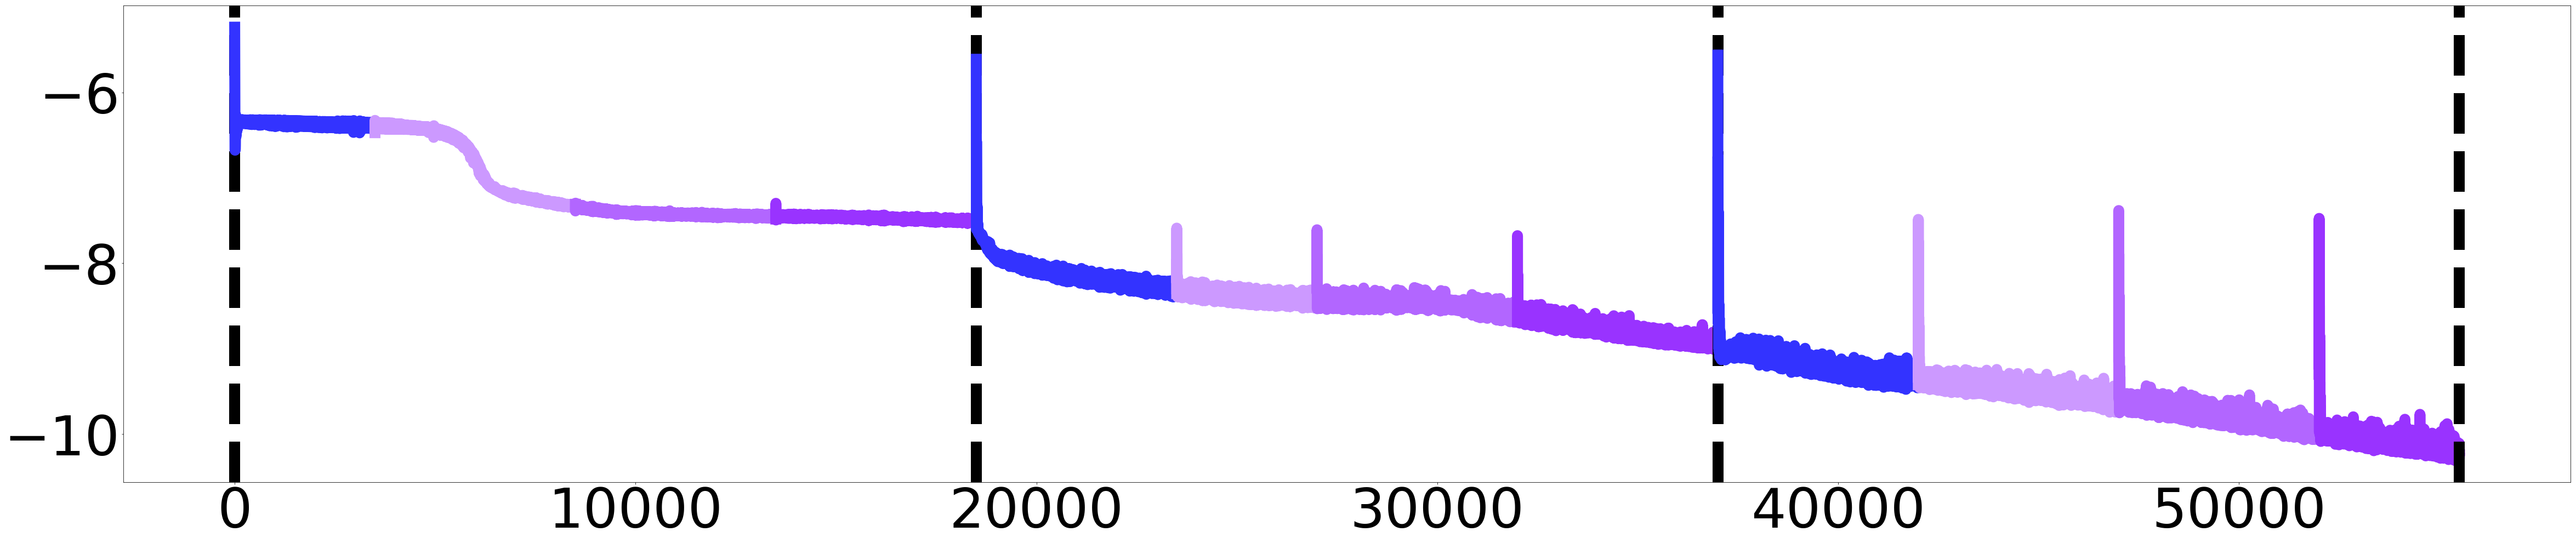

In [28]:
n_colors = 4
colors = [(51/255, 51/255, 255/255)]+ \
         [(204/255, 153/255, 255/255), 
          (178/255, 102/255, 255/255),
          (153/255, 51/255, 255/255),
          (127/255, 0/255, 255/255),
          (102/255, 0/255, 204/255),
          (76/255, 0/255, 153/255)]

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(80, 16))

# plot
s = 0
for i in range(3):
    level_errs = records['val_errs'][i]
    n_widens = len(level_errs)
    ax1.axvline(x=s, color='k', linestyle='--', linewidth=20)
    for j in range(n_widens):
        op_err = level_errs[j]
        ax1.plot(range(s, s + len(op_err)), np.log(op_err), color=colors[j], linewidth=20)
        s += len(op_err)
        
ax1.axvline(x=s-1, color='k', linestyle='--', linewidth=20)

ax1.xaxis.set_tick_params(labelsize=100)
ax1.yaxis.set_tick_params(labelsize=100)

fig1.savefig(os.path.join(result_path, 'err_iter_plot.png'))